In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/Ali-Sahili/vadam.git

Cloning into 'vadam'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1038 (delta 4), reused 10 (delta 4), pack-reused 1026
Receiving objects: 100% (1038/1038), 41.96 MiB | 29.59 MiB/s, done.
Resolving deltas: 100% (170/170), done.


In [ ]:
%cd vadam/pytorch/

/content/vadam/pytorch


In [ ]:
!pip install --user -e .

Obtaining file:///content/vadam/pytorch
  Running setup.py develop for vadam


In [ ]:
!git reset --hard
!git pull

HEAD is now at 970f161 reduce grid size
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/mshukor/vadam
   970f161..83613e0  master     -> origin/master
Updating 970f161..83613e0
Fast-forward
 pytorch/mnist_code/plot_metrics.py    |  0
 pytorch/mnist_code/run_experiments.py | 14 ++++++++++----
 2 files changed, 10 insertions(+), 4 deletions(-)
 delete mode 100644 pytorch/mnist_code/plot_metrics.py


### Train

In [ ]:
# !mkdir ./../vadam/data/MNIST/raw/

!cp ../../drive/MyDrive/MVA/bayesian_ml/mnist_data/t10k-labels-idx1-ubyte.gz ./../vadam/data/MNIST/raw/
!cp ../../drive/MyDrive/MVA/bayesian_ml/mnist_data/t10k-images-idx3-ubyte.gz ./../vadam/data/MNIST/raw/

!cp ../../drive/MyDrive/MVA/bayesian_ml/mnist_data/train-labels-idx1-ubyte.gz ./../vadam/data/MNIST/raw/
!cp ../../drive/MyDrive/MVA/bayesian_ml/mnist_data/train-images-idx3-ubyte.gz ./../vadam/data/MNIST/raw/

In [ ]:
!python mnist_code/run_experiments.py

### Evaluate 

In [ ]:
!cp -r /content/vadam/pytorch/results /content/drive/MyDrive/MVA/bayesian_ml

In [ ]:
!rm -r mnist_code/results/results.zip

In [ ]:
!unzip mnist_code/results/results.zip -d mnist_code/results/

In [ ]:
grid = [(hidden_sizes, mc, bs, prec) 
for hidden_sizes in ([400,400], )
for mc in (10, )
for bs in (1, 10)
for prec in ( 2e-2,   1e0,  1e1, 2e2)]

####################################
## Run experiemtents sequentially ##
####################################
j = 0
for i, (hidden_sizes, mc, bs, prec) in enumerate(grid):
  j+=1

print(j)

8


In [ ]:
!cp -r /content/drive/MyDrive/MVA/bayesian_ml/results .

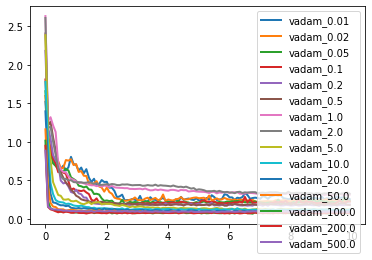

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


plot_every = 10
num_epochs = 10




# for prec in (1e-2, 2e-2, 5e-2, 1e-1, 2e-1, 5e-1, 1e0, 2e0, 5e0, 1e1, 2e1, 5e1, 1e2, 2e2, 5e2):
  
#   file_path = '/content/vadam/pytorch/bbb_mlp_class/mnist/act_func:relu|hidden_sizes:[400, 400]|prior_prec:' + str(prec) +'/batch_size:100|eval_mc_samples:10|num_epochs:200|seed:123|train_mc_samples:1/betas:(0.9, 0.999)|learning_rate:0.001|prec_init:'+str(prec)+'/metric_history.pkl'


#   pkl_file = open(file_path, 'rb')
#   metrics = pickle.load(pkl_file)
#   pkl_file.close()



#   num_evals = len(metrics['test_pred_logloss'])
#   idx = np.arange(start = 0, stop = num_evals, step = plot_every)
#   epoch = (idx+1) * num_epochs / num_evals
#   met = np.array(metrics['test_pred_logloss'])
#   print(met.shape, met.max())
#   if met.max() != 0:
#     plt.plot(epoch, met[idx]/np.log(10), linestyle = '-', linewidth=2, label=str(prec))
#     plt.legend()

for prec in (1e-2, 2e-2, 5e-2, 1e-1, 2e-1, 5e-1, 1e0, 2e0, 5e0, 1e1, 2e1, 5e1, 1e2, 2e2, 5e2):
  
  file_path = '/content/vadam/pytorch/vadam_mlp_class/mnist/act_func:relu|hidden_sizes:[400, 400]|prior_prec:' + str(prec) +'/batch_size:100|eval_mc_samples:10|num_epochs:200|seed:123|train_mc_samples:1/betas:(0.9, 0.999)|learning_rate:0.001|prec_init:'+str(prec)+'/metric_history.pkl'


  pkl_file = open(file_path, 'rb')
  metrics = pickle.load(pkl_file)
  pkl_file.close()



  num_evals = len(metrics['test_pred_logloss'])
  idx = np.arange(start = 0, stop = num_evals, step = plot_every)
  epoch = (idx+1) * num_epochs / num_evals
  met = np.array(metrics['test_pred_logloss'])

  if met.max() != 0:
    plt.plot(epoch, met[idx]/np.log(10), linestyle = '-', linewidth=2, label='vadam_'+str(prec))
    plt.legend()

In [ ]:
!pwd

/content/vadam/pytorch


In [ ]:
!cp -r /content/drive/MyDrive/MVA/bayesian_ml/results .

(900,) 1.046769142150879
(900,) 3.282353401184082


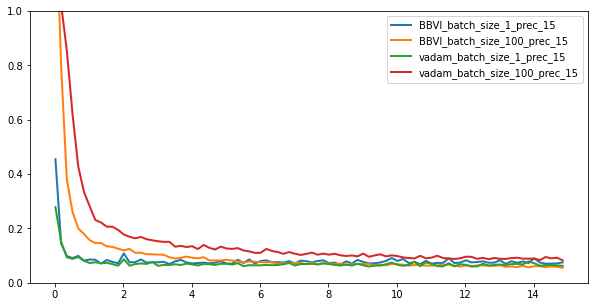

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


plot_every = 10
num_epochs = 15


ep =2
bs = 1
prec = 5e1

bss = (1, 100)
eps = (15, 15)

plt.figure(figsize=(10, 5))
plt.ylim(top=1)
for bs, ep in zip(bss, eps):
  file_path = '/content/vadam/pytorch/results/bbb_mlp_class/mnist/act_func:relu|hidden_sizes:[400]|prior_prec:50.0/batch_size:' + str(bs) +'|eval_mc_samples:10|num_epochs:15|seed:123|train_mc_samples:10/betas:(0.9, 0.999)|learning_rate:0.001|prec_init:50.0/metric_history.pkl'

  # filr_path = '/content/vadam/pytorch/results/bbb_mlp_class/mnist/act_func:relu|hidden_sizes:[400]|prior_prec:' + str(prec) +'/batch_size:'+str(bs)+'|eval_mc_samples:10|num_epochs:'+str(ep)+'|seed:123|train_mc_samples:1/betas:(0.9, 0.999)|learning_rate:0.001|prec_init:50.0/metric_history.pkl'


  pkl_file = open(file_path, 'rb')
  metrics = pickle.load(pkl_file)
  pkl_file.close()



  num_evals = len(metrics['test_pred_logloss'])
  idx = np.arange(start = 0, stop = num_evals, step = plot_every)
  epoch = (idx+1) * num_epochs / num_evals
  met = np.array(metrics['test_pred_logloss'])
  print(met.shape, met.max())
  if met.max() != 0:
    plt.plot(epoch, met[idx]/np.log(10), linestyle = '-', linewidth=2, label='BBVI_batch_size_' + str(bs) +'_prec_'+ str(ep))
    plt.legend()

for bs, ep in zip(bss, eps):
  
  file_path = '/content/vadam/pytorch/results/vadam_mlp_class/mnist/act_func:relu|hidden_sizes:[400]|prior_prec:50.0/batch_size:'+str(bs)+'|eval_mc_samples:10|num_epochs:15|seed:123|train_mc_samples:10/betas:(0.9, 0.999)|learning_rate:0.001|prec_init:50.0/metric_history.pkl'
  # file_path = '/content/vadam/pytorch/mnist_code/results/vadam_mlp_class/mnist/act_func:relu|hidden_sizes:[400, 400]|prior_prec:' + str(prec) +'/batch_size:'+str(bs)+'|eval_mc_samples:10|num_epochs:' +str(ep)+'|seed:123|train_mc_samples:1/betas:(0.9, 0.999)|learning_rate:0.001|prec_init:'+str(prec)+'/metric_history.pkl'


  pkl_file = open(file_path, 'rb')
  metrics = pickle.load(pkl_file)
  pkl_file.close()

  num_evals = len(metrics['test_pred_logloss'])
  idx = np.arange(start = 0, stop = num_evals, step = plot_every)
  epoch = (idx+1) * num_epochs / num_evals
  met = np.array(metrics['test_pred_logloss'])

  if met.max() != 0:
    plt.plot(epoch, met[idx]/np.log(10), linestyle = '-', linewidth=2, label='vadam_batch_size_'+ str(bs) +'_prec_'+ str(ep))
    plt.legend()